<a href="https://colab.research.google.com/github/KalyanMohanty/Projects/blob/master/Linear_Regression_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

### **Linear regression**

In [0]:
n =100

In [160]:
x =torch.ones(n,2)
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.9605,  1.0000],
        [ 0.1542,  1.0000],
        [-0.5222,  1.0000],
        [-0.6735,  1.0000],
        [-0.9749,  1.0000]])

In [0]:
a= tensor(3.,2.)

In [162]:
a

tensor([3., 2.])

In [0]:
y =x@a +torch.rand(n)

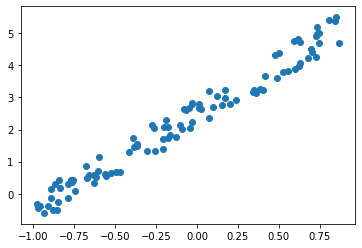

In [164]:
plt.scatter(x[:,0],y)

In [0]:
def mse(y_hat,y):
  return ((y_hat -y)**2).mean()

In [0]:
a = tensor(-1.,1)

In [167]:
y_hat = x@a
mse(y_hat, y)

tensor(6.3455)

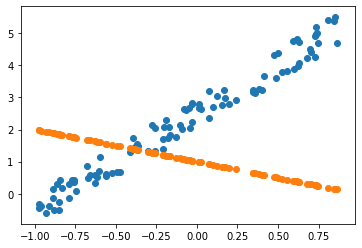

In [168]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

###**Gradien Descent** 

In [169]:
a = nn.Parameter(a)
x@a

tensor([1.9605, 0.8458, 1.5222, 1.6735, 1.9749, 1.6276, 1.2767, 1.7434, 1.0897,
        1.2071, 1.7604, 1.3650, 0.3690, 1.8895, 1.6042, 0.6184, 1.6162, 0.5102,
        0.2738, 0.4093, 1.0323, 0.1491, 0.1573, 1.9728, 0.5877, 0.2676, 0.9759,
        0.3039, 0.9253, 0.6564, 1.2014, 0.6527, 1.3843, 1.2594, 1.7866, 1.1743,
        0.1912, 0.3767, 1.6610, 1.4722, 0.9279, 0.9030, 1.5998, 0.8304, 1.8898,
        0.8282, 0.8763, 1.4930, 1.9316, 0.5264, 1.7857, 1.7682, 1.1792, 0.1351,
        1.1064, 1.3936, 1.0664, 1.7583, 0.2683, 0.2563, 0.3708, 1.8516, 1.8505,
        1.6745, 1.4154, 0.5959, 0.3831, 0.3989, 1.8782, 0.4419, 1.0765, 1.1642,
        0.9897, 0.4756, 1.5605, 0.4998, 0.2574, 1.3668, 1.3036, 0.9850, 1.0490,
        0.3199, 0.7992, 0.7592, 1.1261, 1.2579, 1.5583, 1.1886, 1.0296, 1.0439,
        1.8641, 1.2096, 1.8412, 1.9093, 1.0305, 0.2959, 0.2720, 0.6418, 1.6292,
        1.8344], grad_fn=<MvBackward>)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: 
      print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [171]:
lr = 1e-1
for t in range(100): update()

tensor(6.3455, grad_fn=<MeanBackward0>)
tensor(1.5939, grad_fn=<MeanBackward0>)
tensor(0.5090, grad_fn=<MeanBackward0>)
tensor(0.2083, grad_fn=<MeanBackward0>)
tensor(0.1243, grad_fn=<MeanBackward0>)
tensor(0.1008, grad_fn=<MeanBackward0>)
tensor(0.0942, grad_fn=<MeanBackward0>)
tensor(0.0924, grad_fn=<MeanBackward0>)
tensor(0.0919, grad_fn=<MeanBackward0>)
tensor(0.0917, grad_fn=<MeanBackward0>)


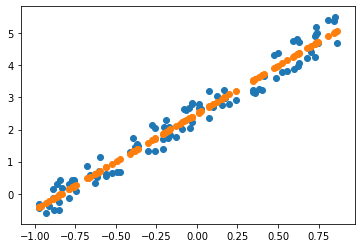

In [172]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a.detach().numpy());

###**Animation**

In [0]:
from matplotlib import animation, rc
rc('animation', html ='jshtml')

In [185]:
a = nn.Parameter(tensor(-1.,1))
fig =plt.figure()
plt.scatter(x[:,0],y ,c ='red')
line, = plt.plot(x[:,0],x@a.detach().numpy())
plt.close()

def animate(i):
  update()
  line.set_ydata(x@a.detach().numpy())
  return line,

animation.FuncAnimation(fig, animate, np.arange(0,100), interval =30)